In [1]:
library(xts)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [2]:
tablo<-readRDS("Final-brent-enflasyon-korelasyon.rds")

In [3]:
head(tablo)

              Brent   Toplam   brentTL TP_DK_USD_A    enf  enf.1  enf.2  enf.3
2006-06-30 69.31583 2.316118 112.63666    1.624308 128.63     NA     NA     NA
2006-07-31 73.68684 2.348493 114.13217    1.548884 129.72 128.63     NA     NA
2006-08-31 73.50682 2.231939 107.49903    1.462191 129.15 129.72 128.63     NA
2006-09-29 61.62550 1.986497  90.70836    1.472710 130.81 129.15 129.72 128.63
2006-10-31 57.88789 2.076004  85.45447    1.476242 132.47 130.81 129.15 129.72
2006-11-30 58.61650 2.112229  84.96947    1.449345 134.18 132.47 130.81 129.15
            enf.4  enf.5  enf.6
2006-06-30 129.72 129.15 130.81
2006-07-31 129.15 130.81 132.47
2006-08-31 130.81 132.47 134.18
2006-09-29 132.47 134.18 134.49
2006-10-31 134.18 134.49 135.84
2006-11-30 134.49 135.84 136.42

In [4]:
install.packages("gdata")

also installing the dependency ‘gtools’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
install.packages("wbstats")

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)


In [5]:
library(wbstats)


In [19]:
oil_data <- wb(indicator = c("CRUDE_DUBAI", "CRUDE_BRENT", "CRUDE_WTI", "COAL_SAFRICA","COAL_COL","COAL_AUS","GOLD"),
               startdate = "2006M06", enddate = "2017M10", freq = "M", POSIXct = TRUE)


In [20]:
head(oil_data,2)

value,date,indicatorID,indicator,iso2c,country,date_ct,granularity
55.58,2017M10,CRUDE_DUBAI,"Crude oil, Dubai, $/bbl, nominal$",1W,World,2017-10-01,monthly
53.86,2017M09,CRUDE_DUBAI,"Crude oil, Dubai, $/bbl, nominal$",1W,World,2017-09-01,monthly


In [21]:
library(reshape2)

In [25]:
emtia_tablo<-dcast(oil_data,date~indicatorID, value.var='value')

In [28]:
head(tablo,2)
tail(emtia_tablo,2)

              Brent   Toplam  brentTL TP_DK_USD_A    enf  enf.1 enf.2 enf.3
2006-06-30 69.31583 2.316118 112.6367    1.624308 128.63     NA    NA    NA
2006-07-31 73.68684 2.348493 114.1322    1.548884 129.72 128.63    NA    NA
            enf.4  enf.5  enf.6
2006-06-30 129.72 129.15 130.81
2006-07-31 129.15 130.81 132.47

,date,COAL_AUS,COAL_COL,COAL_SAFRICA,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,GOLD
136,2017M09,96.86905,82.7400,85.68571,55.16,53.86,49.83,1314.07
137,2017M10,97.14091,84.0625,85.09955,57.62,55.58,51.56,1279.51


In [33]:
summary(emtia_tablo)
emtia_tablo$TLkur<-tablo[1:137,4]
head(emtia_tablo)

     date              COAL_AUS         COAL_COL       COAL_SAFRICA   
 Length:137         Min.   : 44.05   Min.   : 41.38   Min.   : 48.20  
 Class :character   1st Qu.: 62.55   1st Qu.: 57.31   1st Qu.: 61.13  
 Mode  :character   Median : 80.95   Median : 69.30   Median : 77.60  
                    Mean   : 84.08   Mean   : 75.44   Mean   : 80.52  
                    3rd Qu.: 96.87   3rd Qu.: 85.20   3rd Qu.: 89.75  
                    Max.   :180.00   Max.   :170.75   Max.   :167.75  
  CRUDE_BRENT      CRUDE_DUBAI       CRUDE_WTI           GOLD       
 Min.   : 30.80   Min.   : 27.00   Min.   : 30.39   Min.   : 585.8  
 1st Qu.: 55.79   1st Qu.: 54.91   1st Qu.: 52.51   1st Qu.: 939.8  
 Median : 76.69   Median : 75.27   Median : 76.41   Median :1227.1  
 Mean   : 80.67   Mean   : 78.00   Mean   : 75.76   Mean   :1182.1  
 3rd Qu.:108.08   3rd Qu.:104.94   3rd Qu.: 94.76   3rd Qu.:1342.0  
 Max.   :133.87   Max.   :131.22   Max.   :133.93   Max.   :1772.1  
     TLkur.Index    

date,COAL_AUS,COAL_COL,COAL_SAFRICA,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,GOLD,TLkur
2006M06,52.3750,54.25,52.3750,68.85773,65.08091,70.93182,596.145,1.624308
2006M07,52.7500,53.05,51.6800,73.89714,69.04905,74.40421,633.710,1.548884
2006M08,50.9375,55.44,53.5875,73.61217,68.78174,73.04174,632.593,1.462191
2006M09,47.1000,49.50,48.7500,62.77190,59.77286,63.81900,598.186,1.472710
2006M10,44.0500,50.25,49.2125,58.38000,56.50095,58.85045,585.780,1.476242
2006M11,46.0000,51.19,48.2000,58.48318,56.81545,59.13050,627.827,1.449345


In [7]:
saveRDS(emtia_tablo,"20171201-emtia--.rds")

ERROR: Error in saveRDS(emtia_tablo, "20171201-emtia--.rds"): object 'emtia_tablo' not found


In [41]:
write.csv (emtia_tablo,"emtiatabl----o.csv")

In [42]:
tail(emtia_tablo)

,date,COAL_AUS,COAL_COL,COAL_SAFRICA,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,GOLD,TLkur
132,2017M05,74.52000,67.9500,72.48565,50.87,50.31,48.50,1246.04,3.563800
133,2017M06,80.95227,73.9800,77.37136,46.89,46.44,45.17,1260.26,3.518990
134,2017M07,87.53095,78.7500,81.95143,48.69,47.63,46.65,1236.85,3.563679
135,2017M08,95.89000,79.1875,84.25857,51.37,50.43,48.03,1283.04,3.512477
136,2017M09,96.86905,82.7400,85.68571,55.16,53.86,49.83,1314.07,3.468047
137,2017M10,97.14091,84.0625,85.09955,57.62,55.58,51.56,1279.51,3.662259


In [46]:
which.max(emtia_tablo$CRUDE_BRENT)

[1] 26

In [49]:
cor(emtia_tablo[,2:9])

,COAL_AUS,COAL_COL,COAL_SAFRICA,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,GOLD,TLkur
COAL_AUS,1.0000000,0.9519459,0.9830495,0.6451796,0.6448318,0.6559127,0.3468681,-0.3091073
COAL_COL,0.9519459,1.0000000,0.9736121,0.6223830,0.6150920,0.6386832,0.2389303,-0.3189845
COAL_SAFRICA,0.9830495,0.9736121,1.0000000,0.6730969,0.6708876,0.6791346,0.3634995,-0.3034282
CRUDE_BRENT,0.6451796,0.6223830,0.6730969,1.0000000,0.9979618,0.9689528,0.4562557,-0.5106929
CRUDE_DUBAI,0.6448318,0.6150920,0.6708876,0.9979618,1.0000000,0.9676416,0.4666980,-0.5037115
CRUDE_WTI,0.6559127,0.6386832,0.6791346,0.9689528,0.9676416,1.0000000,0.2832844,-0.5828848
GOLD,0.3468681,0.2389303,0.3634995,0.4562557,0.4666980,0.2832844,1.0000000,0.2734550
TLkur,-0.3091073,-0.3189845,-0.3034282,-0.5106929,-0.5037115,-0.5828848,0.2734550,1.0000000


In [50]:
emtia_tablo2<-emtia_tablo

In [52]:
emtia_tablo2$TLkur1<-lag(emtia_tablo$TLkur,-1)
emtia_tablo2$TLkur2<-lag(emtia_tablo$TLkur,-2)
emtia_tablo2$TLkur3<-lag(emtia_tablo$TLkur,-3)
emtia_tablo2$TLkur4<-lag(emtia_tablo$TLkur,-4)

In [56]:
head(emtia_tablo2)

date,COAL_AUS,COAL_COL,COAL_SAFRICA,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,GOLD,TLkur,TLkur1,TLkur2,TLkur3,TLkur4
2006M06,52.3750,54.25,52.3750,68.85773,65.08091,70.93182,596.145,1.624308,1.548884,1.462191,1.472710,1.476242
2006M07,52.7500,53.05,51.6800,73.89714,69.04905,74.40421,633.710,1.548884,1.462191,1.472710,1.476242,1.449345
2006M08,50.9375,55.44,53.5875,73.61217,68.78174,73.04174,632.593,1.462191,1.472710,1.476242,1.449345,1.427032
2006M09,47.1000,49.50,48.7500,62.77190,59.77286,63.81900,598.186,1.472710,1.476242,1.449345,1.427032,1.419458
2006M10,44.0500,50.25,49.2125,58.38000,56.50095,58.85045,585.780,1.476242,1.449345,1.427032,1.419458,1.390689
2006M11,46.0000,51.19,48.2000,58.48318,56.81545,59.13050,627.827,1.449345,1.427032,1.419458,1.390689,1.402868


In [58]:
cor(emtia_tablo2[,2:12], use="complete.obs")

,COAL_AUS,COAL_COL,COAL_SAFRICA,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,GOLD,TLkur,TLkur1,TLkur2,TLkur3
COAL_AUS,1.0000000,0.9523307,0.9839625,0.6643023,0.6635266,0.6789970,0.3444324,-0.3536977,-0.3327990,-0.3130657,-0.2969246
COAL_COL,0.9523307,1.0000000,0.9736992,0.6353199,0.6276306,0.6549117,0.2373355,-0.3525290,-0.3292454,-0.3083457,-0.2915924
COAL_SAFRICA,0.9839625,0.9736992,1.0000000,0.6846841,0.6821243,0.6937119,0.3626525,-0.3315395,-0.3091155,-0.2869191,-0.2691016
CRUDE_BRENT,0.6643023,0.6353199,0.6846841,1.0000000,0.9979240,0.9684275,0.4695997,-0.4959496,-0.4888172,-0.4783537,-0.4650009
CRUDE_DUBAI,0.6635266,0.6276306,0.6821243,0.9979240,1.0000000,0.9671458,0.4798510,-0.4891046,-0.4818509,-0.4710857,-0.4576067
CRUDE_WTI,0.6789970,0.6549117,0.6937119,0.9684275,0.9671458,1.0000000,0.2966544,-0.5675854,-0.5607679,-0.5490727,-0.5332823
GOLD,0.3444324,0.2373355,0.3626525,0.4695997,0.4798510,0.2966544,1.0000000,0.2716796,0.2782114,0.2857312,0.2929055
TLkur,-0.3536977,-0.3525290,-0.3315395,-0.4959496,-0.4891046,-0.5675854,0.2716796,1.0000000,0.9956706,0.9885429,0.9821103
TLkur1,-0.3327990,-0.3292454,-0.3091155,-0.4888172,-0.4818509,-0.5607679,0.2782114,0.9956706,1.0000000,0.9958146,0.9891718
TLkur2,-0.3130657,-0.3083457,-0.2869191,-0.4783537,-0.4710857,-0.5490727,0.2857312,0.9885429,0.9958146,1.0000000,0.9958495


In [59]:
library(leaps)

In [ ]:
regsubsets(data=emtia_tablo2,TLkur2~.,nbest = 1, really.big=T)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“11  linear dependencies found”

###  buradan başla

In [1]:
veri<-read.csv("emtiatablo.csv")

In [2]:
ncol(veri)

[1] 10

In [5]:
veri[1,2]

[1] 2006M06
137 Levels: 2006M06 2006M07 2006M08 2006M09 2006M10 2006M11 2006M12 ... 2017M10

In [3]:
head(veri)

X,date,COAL_AUS,COAL_COL,COAL_SAFRICA,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,GOLD,TLkur
1,2006M06,52.3750,54.25,52.3750,68.85773,65.08091,70.93182,596.145,1.624308
2,2006M07,52.7500,53.05,51.6800,73.89714,69.04905,74.40421,633.710,1.548884
3,2006M08,50.9375,55.44,53.5875,73.61217,68.78174,73.04174,632.593,1.462191
4,2006M09,47.1000,49.50,48.7500,62.77190,59.77286,63.81900,598.186,1.472710
5,2006M10,44.0500,50.25,49.2125,58.38000,56.50095,58.85045,585.780,1.476242
6,2006M11,46.0000,51.19,48.2000,58.48318,56.81545,59.13050,627.827,1.449345


In [30]:
aylik_emtia<-ts(veri[,3:10],start = c(2006,06), frequency = 12)


In [31]:
head(aylik_emtia)

COAL_AUS,COAL_COL,COAL_SAFRICA,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,GOLD,TLkur
52.3750,54.25,52.3750,68.85773,65.08091,70.93182,596.145,1.624308
52.7500,53.05,51.6800,73.89714,69.04905,74.40421,633.710,1.548884
50.9375,55.44,53.5875,73.61217,68.78174,73.04174,632.593,1.462191
47.1000,49.50,48.7500,62.77190,59.77286,63.81900,598.186,1.472710
44.0500,50.25,49.2125,58.38000,56.50095,58.85045,585.780,1.476242
46.0000,51.19,48.2000,58.48318,56.81545,59.13050,627.827,1.449345


In [32]:
ccf(aylik_emtia$TLkur, aylik_emtia$COAL_AUS)

ERROR: Error in aylik_emtia$TLkur: $ operator is invalid for atomic vectors


In [18]:
cor(aylik_emtia)

,COAL_AUS,COAL_COL,COAL_SAFRICA,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,GOLD,TLkur
COAL_AUS,1.0000000,0.9519459,0.9830495,0.6451796,0.6448318,0.6559127,0.3468681,-0.3091073
COAL_COL,0.9519459,1.0000000,0.9736121,0.6223830,0.6150920,0.6386832,0.2389303,-0.3189845
COAL_SAFRICA,0.9830495,0.9736121,1.0000000,0.6730969,0.6708876,0.6791346,0.3634995,-0.3034282
CRUDE_BRENT,0.6451796,0.6223830,0.6730969,1.0000000,0.9979618,0.9689528,0.4562557,-0.5106929
CRUDE_DUBAI,0.6448318,0.6150920,0.6708876,0.9979618,1.0000000,0.9676416,0.4666980,-0.5037115
CRUDE_WTI,0.6559127,0.6386832,0.6791346,0.9689528,0.9676416,1.0000000,0.2832844,-0.5828848
GOLD,0.3468681,0.2389303,0.3634995,0.4562557,0.4666980,0.2832844,1.0000000,0.2734550
TLkur,-0.3091073,-0.3189845,-0.3034282,-0.5106929,-0.5037115,-0.5828848,0.2734550,1.0000000


In [37]:
library(xts)
aylik_emtia<-as.xts(aylik_emtia)
head(aylik_emtia$TLkur,3)
head(lag(aylik_emtia$TLkur,-1),3)
aylik_emtia$TLkur1<-lag(aylik_emtia$TLkur,-1)
aylik_emtia$TLkur2<-lag(aylik_emtia$TLkur,-2)
aylik_emtia$TLkur3<-lag(aylik_emtia$TLkur,-3)
aylik_emtia$TLkur4<-lag(aylik_emtia$TLkur,-4)
aylik_emtia$TLkur5<-lag(aylik_emtia$TLkur,-5)
aylik_emtia$TLkur6<-lag(aylik_emtia$TLkur,-6)




            TLkur
Jun 2006 1.624308
Jul 2006 1.548884
Aug 2006 1.462191

            TLkur
Jun 2006 1.548884
Jul 2006 1.462191
Aug 2006 1.472710

In [43]:
cor(aylik_emtia, use="complete.obs")

,COAL_AUS,COAL_COL,COAL_SAFRICA,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,GOLD,TLkur,TLkur1,TLkur2,TLkur3,TLkur4,TLkur5,TLkur6
COAL_AUS,1.0000000,0.9523064,0.9839717,0.6732744,0.6719006,0.6892759,0.3454092,-0.3729298,-0.3488480,-0.3262413,-0.3095773,-0.2965281,-0.2885107,-0.2821376
COAL_COL,0.9523064,1.0000000,0.9737220,0.6446903,0.6362807,0.6656816,0.2379533,-0.3737224,-0.3470414,-0.3231552,-0.3057285,-0.2927276,-0.2844423,-0.2787568
COAL_SAFRICA,0.9839717,0.9737220,1.0000000,0.6932498,0.6900531,0.7034751,0.3637166,-0.3477569,-0.3222495,-0.2972511,-0.2786976,-0.2653333,-0.2561244,-0.2493121
CRUDE_BRENT,0.6732744,0.6446903,0.6932498,1.0000000,0.9978733,0.9673190,0.4840834,-0.4690135,-0.4613477,-0.4504160,-0.4361450,-0.4199674,-0.4046522,-0.3912271
CRUDE_DUBAI,0.6719006,0.6362807,0.6900531,0.9978733,1.0000000,0.9661012,0.4937887,-0.4633089,-0.4554722,-0.4441830,-0.4297398,-0.4140095,-0.3990533,-0.3857695
CRUDE_WTI,0.6892759,0.6656816,0.7034751,0.9673190,0.9661012,1.0000000,0.3089021,-0.5445147,-0.5369086,-0.5243942,-0.5074278,-0.4878438,-0.4690476,-0.4529137
GOLD,0.3454092,0.2379533,0.3637166,0.4840834,0.4937887,0.3089021,1.0000000,0.2785706,0.2844580,0.2915476,0.2990861,0.3073800,0.3147601,0.3210151
TLkur,-0.3729298,-0.3737224,-0.3477569,-0.4690135,-0.4633089,-0.5445147,0.2785706,1.0000000,0.9952308,0.9874637,0.9803396,0.9735439,0.9668463,0.9620010
TLkur1,-0.3488480,-0.3470414,-0.3222495,-0.4613477,-0.4554722,-0.5369086,0.2844580,0.9952308,1.0000000,0.9954178,0.9881826,0.9810666,0.9741750,0.9684514
TLkur2,-0.3262413,-0.3231552,-0.2972511,-0.4504160,-0.4441830,-0.5243942,0.2915476,0.9874637,0.9954178,1.0000000,0.9956733,0.9886089,0.9815326,0.9752906


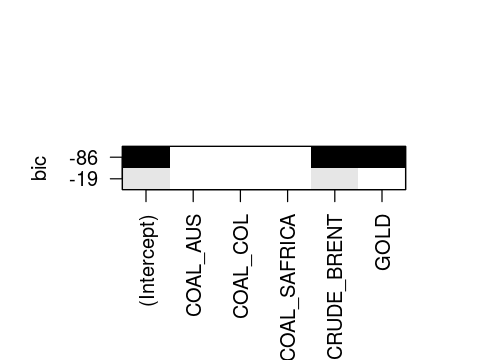

In [50]:
library(leaps)
plot(regsubsets(data=aylik_emtia, TLkur4~COAL_AUS+COAL_COL+COAL_SAFRICA+CRUDE_BRENT+GOLD, nvmax = 2 , nbest = 1))

In [52]:
model<-lm(data=aylik_emtia, TLkur4~CRUDE_BRENT+GOLD)
summary(model)


Call:
lm(formula = TLkur4 ~ CRUDE_BRENT + GOLD, data = aylik_emtia)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88186 -0.40635 -0.08567  0.39309  1.12878 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.8800432  0.1754752  10.714   <2e-16 ***
CRUDE_BRENT -0.0198904  0.0017970 -11.069   <2e-16 ***
GOLD         0.0014864  0.0001532   9.705   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4889 on 130 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.5326,	Adjusted R-squared:  0.5255 
F-statistic: 74.08 on 2 and 130 DF,  p-value: < 2.2e-16


In [45]:
llxc = function( a, ll=-12:12, legend.loc="topleft", displayLegend=T, legend.cex=1.0, overplot=F )
{
	if ( ncol(a) < 2 )
	{
		print( "Not enough columns")
		return;
	}
	
	a = na.omit(a)
	
	b = a[,1]
	firstplot = T
	
	colours = RColorBrewer::brewer.pal(length(names(a)), "Dark2")
	colours[1] = "black"
	count = 1
	
	s = {}
	
	ylim = c(0, 0)

	d = c()
	for ( x in names(a)[2:length(names(a))] )
	{
		print(x)
		c = a[,x]
		for ( y in ll )
		{
			z = na.omit(merge(lag(b, k=y), c))
			r = cor(z)[2]
			d = c( d, r )
		}
	}	
	
	ylim = c(min(d), max(d))
	
	for ( x in names(a)[2:length(names(a))] )
	{
		print(x)
		c = a[,x]
		d = c()
		for ( y in ll )
		{
			z = na.omit(merge(lag(b, k=y), c))
			r = cor(z)[2]
			d = c( d, r )
		}
		
		s[x] = d
		print(paste("Max correlation:", max(abs(d))))
		
		if ( firstplot == T )
		{
			if ( overplot == T )
			{
				par(yaxt="n")
			}
			periodicityOfData = cat( periodicity(a)$label, "s", sep="" )
			print(periodicityOfData)
			plot(ll, d, type="l", col=colours[count], ylim=ylim, xlab=periodicityOfData, ylab="Correlation Coefficient")
			firstplot = F
		}
		else
		{
			if ( overplot == T )
			{
				par(new=T, xaxt="n", yaxt="n")
				plot(ll, d, col=colours[count], type="l")				
			}
			else
			{
				lines(ll, d, col=colours[count], type="l")
			}
		}
		count = count + 1
	}
	print (s)
	
	if ( displayLegend == T )
	{
		legend(legend.loc, names(a)[2:length(names(a))], col=colours, lty=1, cex=legend.cex)	
	}
	grid()
	par(xaxt="s", yaxt="s")
}



[1] "CRUDE_BRENT"
[1] "GOLD"
[1] "CRUDE_BRENT"


Warning message in s[x] = d:
"number of items to replace is not a multiple of replacement length"

[1] "Max correlation: 0.543988228805697"
monthsNULL
[1] "GOLD"


Warning message in s[x] = d:
"number of items to replace is not a multiple of replacement length"

[1] "Max correlation: 0.370774560501905"
CRUDE_BRENT        GOLD 
 -0.2613789   0.3673099 


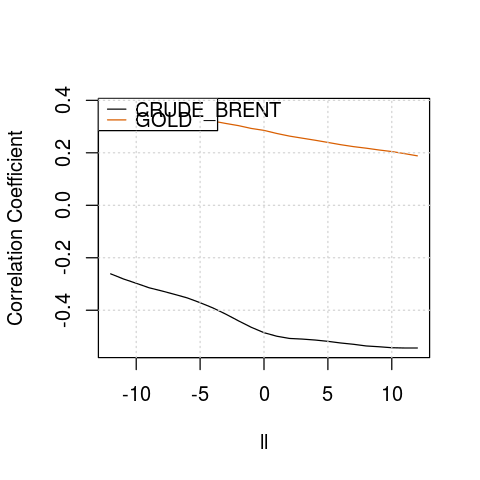

In [62]:
options(repr.plot.height=4, repr.plot.width=4)
# TLkur3 ile 4 ve 7. kolonun korelasyonu
llxc(aylik_emtia[,c(10,4,7)])

Warning message in plot.xts(aylik_emtia):
"only the univariate series will be plotted"

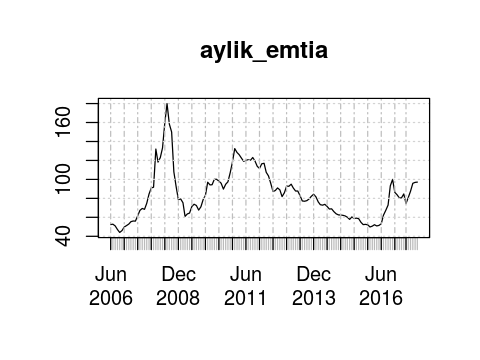

In [38]:
plot(aylik_emtia)


Warning message in decompose(aylik_emtia[, 4]):
"Incompatible methods ("Ops.xts", "Ops.ts") for "-""Warning message in structure(list(x = x, seasonal = seasonal, trend = trend, random = if (type == :
"Incompatible methods ("Ops.xts", "Ops.ts") for "-""Warning message in .cbind.ts(list(e1, e2), c(deparse(substitute(e1))[1L], deparse(substitute(e2))[1L]), :
"non-intersecting series"

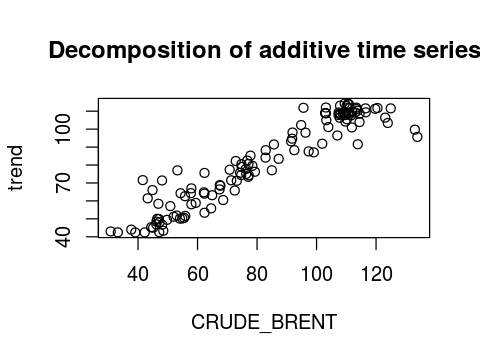

In [39]:
plot(decompose(aylik_emtia[,4]))

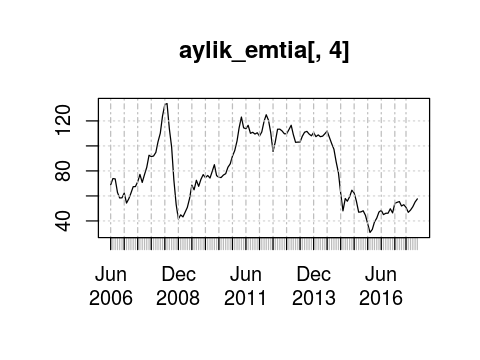

In [40]:
plot(aylik_emtia[,4])

In [17]:
library(forecast)

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



In [41]:
fit_emtia<-hw(aylik_emtia[,4])


ERROR: Error in eval(expr, envir, enclos): could not find function "hw"


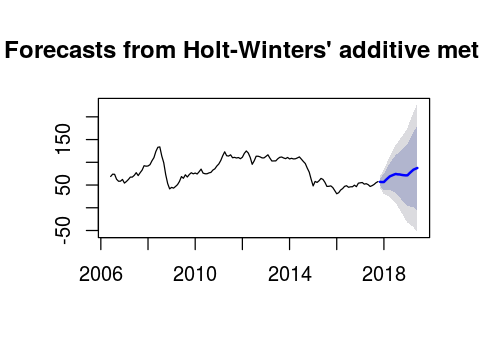

In [20]:
plot(forecast(fit_emtia,h=20))

In [21]:
forecast(fit_emtia,h=20)

         Point Forecast     Lo 80     Hi 80      Lo 95     Hi 95
Nov 2017       57.00197 48.794455  65.20949  44.449658  69.55428
Dec 2017       56.55356 43.300304  69.80681  36.284455  76.82266
Jan 2018       56.69570 39.144917  74.24647  29.854097  83.53729
Feb 2018       61.12118 39.512732  82.72963  28.073910  94.16845
Mar 2018       65.11811 39.529974  90.70625  25.984431 104.25180
Apr 2018       68.99942 39.437081  98.56176  23.787722 114.21112
May 2018       70.92509 37.356043 104.49414  19.585663 122.26452
Jun 2018       72.75413 35.124117 110.38415  15.203990 130.30428
Jul 2018       74.37539 32.617010 116.13377  10.511460 138.23932
Aug 2018       73.50519 27.542907 119.46748   3.211943 143.79844
Sep 2018       73.32972 23.082884 123.57656  -3.516186 150.17563
Oct 2018       72.34496 17.729431 126.96049 -11.182283 155.87220
Nov 2018       71.72693 12.657371 130.79649 -18.612164 162.06602
Dec 2018       71.27852  7.668228 134.88881 -26.005025 168.56206
Jan 2019       71.42065  

In [23]:
forecast(fit_emtia,h=20,level=c(10,30,70,90))

ERROR: Error in forecast.forecast(fit_emtia, h = 20, level = c(10, 30, 70, 90)): Please set the level argument when the forecasts are first computed


In [24]:
fit_emtia<-hw(aylik_emtia[,4], level = c(10,40,90))


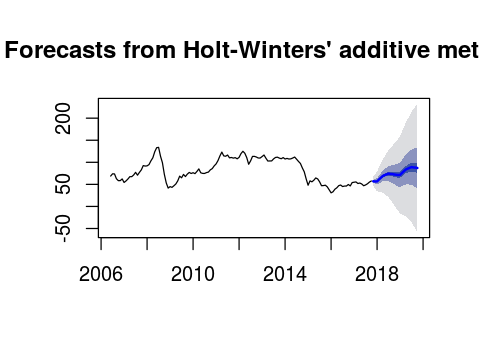

In [26]:
plot(forecast(fit_emtia))